<a href="https://colab.research.google.com/github/Jeevinee/CodeClauseInternship_WinePrice/blob/main/Wine_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv("/content/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [92]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [93]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [94]:
df['fixed acidity']=df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity']=df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid']=df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar']=df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides']=df['chlorides'].fillna(df['chlorides'].mean())
df['pH']=df['pH'].fillna(df['pH'].mean())
df['sulphates']=df['sulphates'].fillna(df['sulphates'].mean())

In [95]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
df.groupby('quality').mean()

<ipython-input-96-26080c041030>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060139,20.636574,103.432870,0.994833,3.231620,0.505006,10.180093
5,7.329085,0.389721,0.307726,5.804116,0.064666,30.237371,120.839102,0.995849,3.212051,0.526418,9.837783
6,7.178091,0.313767,0.323783,5.551144,0.054169,31.165021,115.410790,0.994558,3.217702,0.532466,10.587553
7,7.128962,0.288989,0.334764,4.734610,0.045272,30.422150,108.498610,0.993126,3.227773,0.547025,11.386006
8,6.840500,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


<Axes: >

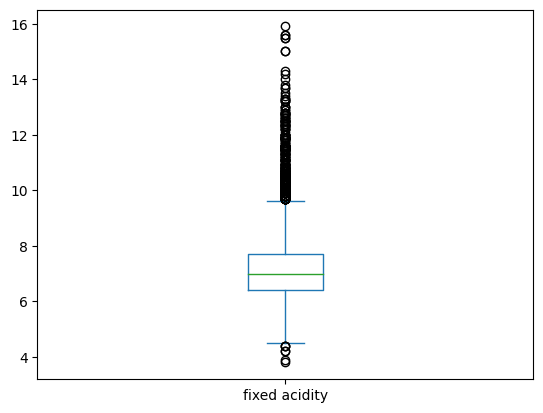

In [97]:
df['fixed acidity'].plot(kind='box')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

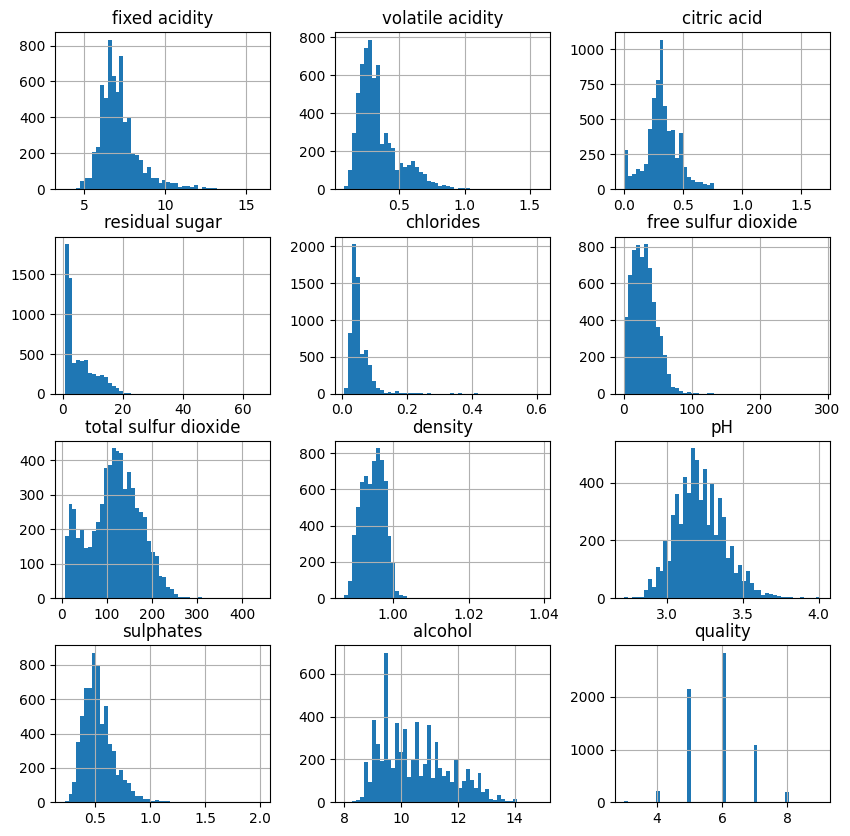

In [98]:
df.hist(figsize=(10,10),bins=50)

In [99]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [100]:
df['good_quality']=[1 if x>=6 else 0 for x in df['quality']]
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [101]:
X=df.drop(['type','quality','good_quality'],axis=1)
y=df['good_quality']

In [102]:
df['good_quality'].value_counts()

1    4113
0    2384
Name: good_quality, dtype: int64

In [103]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [104]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    1
6494    1
6495    0
6496    1
Name: good_quality, Length: 6497, dtype: int64

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
classifier=ExtraTreesClassifier()
classifier.fit(X,y)
score=classifier.feature_importances_
print(score)

[0.07172411 0.11550997 0.07853718 0.07566209 0.07854045 0.08326703
 0.08064463 0.08728507 0.07059303 0.07656659 0.18166983]


In [106]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix
res=pd.DataFrame(columns=['Model','Score'])
res.loc[len(res)]=['LogisticRegression',accuracy_score(test_y,pred_y)]
res

,Model,Score
0,LogisticRegression,0.727692


KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

In [110]:
res.loc[len(res)]=['KNeighborsClassifier',accuracy_score(test_y,pred_y)]
res

,Model,Score
0,LogisticRegression,0.727692
1,KNeighborsClassifier,0.677949


SVM

In [111]:
from sklearn.svm import SVC
model=SVC()
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

In [112]:
res.loc[len(res)]=['SVC',accuracy_score(test_y,pred_y)]
res

,Model,Score
0,LogisticRegression,0.727692
1,KNeighborsClassifier,0.677949
2,SVC,0.638462


XGBClassifier

In [113]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1)
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

In [114]:
res.loc[len(res)]=['XBGClassifier',accuracy_score(test_y,pred_y)]
res

,Model,Score
0,LogisticRegression,0.727692
1,KNeighborsClassifier,0.677949
2,SVC,0.638462
3,XBGClassifier,0.804103
